In [1]:
# Load pickled data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving classlabels.csv to classlabels.csv


In [0]:
import pickle
training_file = "/content/drive/My Drive/train.p"
validation_file= "/content/drive/My Drive/valid.p"
testing_file = "/content/drive/My Drive/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
train['features'][1][1]

array([[ 27,  24,  24],
       [ 27,  24,  24],
       [ 28,  25,  24],
       [ 27,  25,  24],
       [ 27,  26,  25],
       [ 29,  29,  28],
       [ 40,  34,  34],
       [ 51,  38,  37],
       [ 46,  31,  27],
       [ 44,  27,  25],
       [ 56,  40,  41],
       [ 79,  65,  69],
       [ 94,  84,  86],
       [100,  92,  91],
       [106,  99,  96],
       [108, 102,  97],
       [107, 101,  96],
       [101,  93,  91],
       [ 87,  76,  75],
       [ 75,  59,  52],
       [ 67,  44,  31],
       [ 61,  30,  21],
       [ 58,  29,  29],
       [ 55,  35,  39],
       [ 46,  34,  35],
       [ 38,  29,  27],
       [ 33,  27,  25],
       [ 31,  27,  24],
       [ 31,  27,  25],
       [ 31,  27,  25],
       [ 31,  27,  26],
       [ 33,  29,  27]], dtype=uint8)

In [0]:
# Number of training examples
n_train = len(X_train)
# Number of validation examples
n_validation = len(X_valid)
# Number of testing examples.
n_test = len(X_test)
# The shape of an image
image_shape = X_train[0].shape
# Number of unique classes/labels in the dataset.
n_classes = len(set(y_train))
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


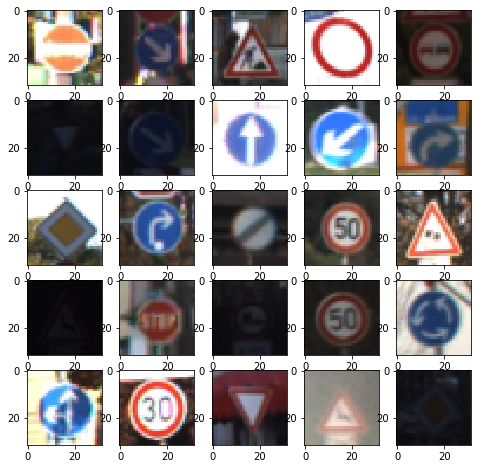

In [0]:
# Display a few random images from training set
import random
import matplotlib.pyplot as plt
%matplotlib inline
n_rows = 5
n_cols = 5
plt.figure(figsize=(8, 8))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    index = random.randint(0, len(X_train))
    image = X_train[index]
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(image)


In [0]:
from google.colab import files
uploaded = files.upload()

Saving classlabels.csv to classlabels.csv


In [0]:
# Display numbers and corresponding sign names
import pandas as pd
import io
sign_names = pd.read_csv(io.BytesIO(uploaded['classlabels.csv']))
print(sign_names.to_string(index=False))

 ClassId                                                            signName
                        0                               Speed limit (20km/h)
                        1                               Speed limit (30km/h)
                        2                               Speed limit (50km/h)
                        3                               Speed limit (60km/h)
                        4                               Speed limit (70km/h)
                        5                               Speed limit (80km/h)
                        6                        End of speed limit (80km/h)
                        7                              Speed limit (100km/h)
                        8                              Speed limit (120km/h)
                        9                                         No passing
                       10       No passing for vehicles over 3.5 metric tons
                       11              Right-of-way at the next intersection

In [0]:
import numpy as np

names, counts = np.unique(y_train, return_counts=True)
label_counts = pd.DataFrame(dict(zip(names, counts)), index=['Counts']).T
label_counts['Names'] = sign_names['signName']
label_counts
print("Five min elements:\n")
print(label_counts.sort_values(['Counts']).head().to_string(index=False))
print("-"*45)
print("\nFive max elements:\n")
print(label_counts.sort_values(['Counts'], ascending=False).head().to_string(index=False))

Five min elements:

 Counts                                Names
    180                 Speed limit (20km/h)
    180                  Go straight or left
    180          Dangerous curve to the left
    210  End of all speed and passing limits
    210                          pedestrians
---------------------------------------------

Five max elements:

 Counts                 Names
   2010  Speed limit (50km/h)
   1980  Speed limit (30km/h)
   1920                 Yield
   1890         Priority road
   1860            Keep right


In [0]:
# Preprocess data: helper functions
import cv2
import numpy as np

# Improve contrast in images using CLAHE technique
def correct_contrast(dataset):
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(4,4))
    data = np.copy(dataset)
    for i in range(len(data)):
        img = data[i] 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        img[:, :, 2] = clahe.apply(img[:, :, 2])
        img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        data[i] = img
    return data

# Zero-center data
def zero_center(dataset):
    data = np.copy(dataset)
    data = data - np.mean(data)
    return data

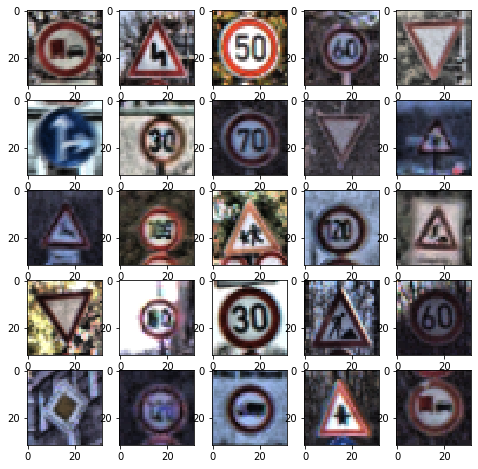

In [0]:
# Preprocess data: improve contrast in images using CLAHE technique
X_train_corr = correct_contrast(X_train)
X_valid_corr = correct_contrast(X_valid)
X_test_corr = correct_contrast(X_test)

# display result
n_rows = 5
n_cols = 5
plt.figure(figsize=(8, 8))

for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    index = random.randint(0, len(X_train_corr))
    image = X_train_corr[index]
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

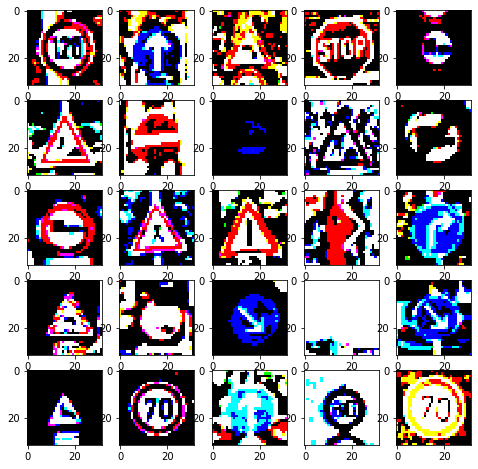

In [0]:
# Preprocess data: zero-centering 
X_train_norm = zero_center(X_train_corr)
X_valid_norm = zero_center(X_valid_corr)
X_test_norm = zero_center(X_test_corr)

# display result
n_rows = 5
n_cols = 5
plt.figure(figsize=(8, 8))

for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    index = random.randint(0, len(X_train_norm))
    image = X_train_norm[index]
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(image)

In [0]:
'''CNN 6 layers, He initialization, batch normalization, learning rate step decay, dropout. 
   CONV[5x5x64] -> CONV[3x3x128] -> CONV[3x3x256] -> FC[1024x512] -> FC[512x256] -> FC[256x43]'''

import tensorflow as tf
from sklearn.utils import shuffle

tf.reset_default_graph()
# Training parameters
epochs = 10
batch_size = 128
rate = 0.0008
dropout = [0.65, 0.5, 0.4]
step_decay = 0.5
decay_frequency = 5

# Tensorflow graph placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, 43)
# dropout parameters
keep_prob_conv1 = tf.placeholder(tf.float32, name='drop1')
keep_prob_conv2 = tf.placeholder(tf.float32, name='drop2')
keep_prob_fc = tf.placeholder(tf.float32, name='drop3')
# batch normalization parameter to set training/testing mode
phase = tf.placeholder(tf.bool, name='phase')

# CNN architecture
def FNet(x):
    # Layer 1: Convolutional. Input = 32x32x3. Filter 5x5x64. Output = 28x28x64.  
    conv1_weights = tf.get_variable('W1', shape=[5, 5, 3, 64],initializer=tf.contrib.layers.variance_scaling_initializer()) 
    conv1_biases = tf.get_variable('b1', shape=[64], initializer=tf.zeros_initializer())
    conv1 = tf.nn.conv2d(x, conv1_weights, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_biases, name='conv1')
    # batch normalization
    conv1 = tf.contrib.layers.batch_norm(conv1, is_training=phase)
    # activation
    conv1 = tf.nn.relu(conv1)
    # max pooling. Output = 14x14x64
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # dropout
    conv1 = tf.nn.dropout(conv1, keep_prob_conv1)
    print("Check shapes:")
    print("c1: ", conv1.get_shape())

    # Layer 2: Convolutional. Input = 14x14x64. Output = 12x12x128
    conv2_weights = tf.get_variable('W2', shape=[3, 3, 64, 128], initializer=tf.contrib.layers.variance_scaling_initializer()) 
    conv2_biases = tf.get_variable('b2', shape=[128], initializer=tf.zeros_initializer())
    conv2 = tf.nn.conv2d(conv1, conv2_weights, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_biases, name='conv2')
    # batch normalization
    conv2 = tf.contrib.layers.batch_norm(conv2, is_training=phase)
    # activation
    conv2 = tf.nn.relu(conv2)
    # max pooling. Output = 6x6x128
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # dropout
    conv2 = tf.nn.dropout(conv2, keep_prob_conv2)
    print("c2: ", conv2.get_shape())

    # Layer 3: Convolutional. Input = 6x6x128. Output = 4x4x256 
    conv3_weights = tf.get_variable('W3', shape=[3, 3, 128, 256], initializer=tf.contrib.layers.variance_scaling_initializer()) 
    conv3_biases = tf.get_variable('b3', shape=[256], initializer=tf.zeros_initializer())
    conv3 = tf.nn.conv2d(conv2, conv3_weights, strides=[1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.bias_add(conv3, conv3_biases, name='conv3')
    # batch normalization
    conv3 = tf.contrib.layers.batch_norm(conv3, is_training=phase)
    # activation
    conv3 = tf.nn.relu(conv3)
    # max pooling. Output = 2x2x256
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # dropout
    conv3 = tf.nn.dropout(conv3, keep_prob_conv2)
    print("c3: ", conv3.get_shape())

    # Flatten. Input = 2x2x256. Output = 1024.
    flatten_layer = tf.contrib.layers.flatten(conv3)
    print("flat: ", flatten_layer.get_shape())

    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc1_weights = tf.get_variable('W4', shape=[1024, 512], initializer=tf.contrib.layers.variance_scaling_initializer()) 
    fc1_biases = tf.get_variable('b4', shape=[512], initializer=tf.zeros_initializer())
    fc1 = tf.add(tf.matmul(flatten_layer, fc1_weights), fc1_biases, name='fc1')
    # batch normalization
    fc1 = tf.contrib.layers.batch_norm(fc1, is_training=phase)
    # activation
    fc1 = tf.nn.relu(fc1)
    # dropout
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)
    print("fc1: ", fc1.get_shape())

    # Layer 5: Fully Connected. Input = 512. Output = 512.
    fc2_weights = tf.get_variable('W5', shape=[512, 256], initializer=tf.contrib.layers.variance_scaling_initializer()) 
    fc2_biases = tf.get_variable('b5', shape=[256], initializer=tf.zeros_initializer())
    fc2 = tf.add(tf.matmul(fc1, fc2_weights), fc2_biases, name='fc2')
    # batch normalization
    fc2 = tf.contrib.layers.batch_norm(fc2, is_training=phase)
    # activation
    fc2 = tf.nn.relu(fc2)
    # dropout
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)
    print("fc2: ", fc2.get_shape())

    # Layer 6: Fully Connected. Input = 256. Output = 43.
    fc3_weights = tf.get_variable('W6', shape=[256, 43], initializer=tf.contrib.layers.xavier_initializer()) 
    fc3_biases = tf.get_variable('b6', shape=[43], initializer=tf.zeros_initializer())
    logits = tf.add(tf.matmul(fc2, fc3_weights), fc3_biases, name='output')
    print("logits: ", logits.get_shape())
    
    return logits

In [0]:
# Logits
logits = FNet(x)

Check shapes:
c1:  (?, 14, 14, 64)
c2:  (?, 6, 6, 128)
c3:  (?, 2, 2, 256)
flat:  (?, 1024)
fc1:  (?, 512)
fc2:  (?, 256)
logits:  (?, 43)


In [0]:
# Training pipeline
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=rate)

# necessary op for batch normalization
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    training_operation = optimizer.minimize(loss_operation)

# Model evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x,
                                                           y: batch_y,
                                                           keep_prob_conv1: 1.0,
                                                           keep_prob_conv2: 1.0,
                                                           keep_prob_fc: 1.0, 
                                                           phase: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [0]:
%%time
# Train model with learning rate step decay
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    plot_learning_curves = []
    
    print("Training...")
    print()
    print("learning rate: ", rate)
    
    for epoch in range(epochs):
        if (epoch + 1) != epochs and (epoch + 1) % decay_frequency == 0:
            rate *= step_decay
            print("New learning rate: ", rate)
            print()
            
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, 
                                                    y: batch_y,
                                                    keep_prob_conv1: dropout[0],
                                                    keep_prob_conv2: dropout[1],
                                                    keep_prob_fc: dropout[2], 
                                                    phase: True})
        
        training_accuracy = evaluate(X_train_norm, y_train)
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        plot_learning_curves.append(validation_accuracy)
        
        print("EPOCH {} ...".format(epoch + 1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()       
    
    plot_later = pd.DataFrame(plot_learning_curves, columns=['accuracy'])
    plot_later.to_csv('fnet_6layers_bn_decay_moreparameters_clahe.csv', index=False)
    
    saver.save(sess, './fnet')
    print("Model saved")

Training...

learning rate:  0.0008
EPOCH 1 ...
Training Accuracy = 0.094
Validation Accuracy = 0.080

EPOCH 2 ...
Training Accuracy = 0.483
Validation Accuracy = 0.465

EPOCH 3 ...
Training Accuracy = 0.818
Validation Accuracy = 0.776

EPOCH 4 ...
Training Accuracy = 0.890
Validation Accuracy = 0.866

New learning rate:  0.0004

EPOCH 5 ...
Training Accuracy = 0.943
Validation Accuracy = 0.916

EPOCH 6 ...
Training Accuracy = 0.962
Validation Accuracy = 0.927

EPOCH 7 ...
Training Accuracy = 0.980
Validation Accuracy = 0.947

EPOCH 8 ...
Training Accuracy = 0.981
Validation Accuracy = 0.952

EPOCH 9 ...
Training Accuracy = 0.984
Validation Accuracy = 0.953

EPOCH 10 ...
Training Accuracy = 0.991
Validation Accuracy = 0.963

Model saved
CPU times: user 1h 16min 10s, sys: 56.6 s, total: 1h 17min 7s
Wall time: 39min 33s


In [0]:
# Evaluate model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./fnet
Test Accuracy = 0.966
